# Intrinsic Stacking Domains in bilayer graphene on SiC
This notebook explores some aspects of the Low Energy Electron Microscopy ([LEEM](https://en.wikipedia.org/wiki/Low-energy_electron_microscopy)) dataset `Intrinsic Stacking domains in graphene on silicon carbide: a pathway for intercalation`, which can be found at https://doi.org/10.4121/uuid:a7ff07f4-0ac8-4778-bec9-636532cfcfc1. It uses [xarray](http://xarray.pydata.org) to conveniently access the [netCDF4](https://en.wikipedia.org/wiki/NetCDF) files without downloading the entire dataset.  

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
opendap_location =  'https://opendap.tudelft.nl/thredds/dodsC/data2/uuid/a7ff07f4-0ac8-4778-bec9-636532cfcfc1/'

BF = xr.open_dataset(opendap_location + 'G_SiC_BF.nc')
DF1 = xr.open_dataset(opendap_location + 'G_SiC_DF1.nc')
DF2 = xr.open_dataset(opendap_location + 'G_SiC_DF2.nc')
print(DF2)

<xarray.Dataset>
Dimensions:      (time: 412, x: 1545, y: 1223)
Coordinates:
  * time         (time) datetime64[ns] 2017-11-20T21:56:11 ... 2017-11-20T22:59:23
  * x            (x) float64 0.0 2.734 5.469 ... 4.216e+03 4.219e+03 4.222e+03
  * y            (y) float64 0.0 2.734 5.469 ... 3.336e+03 3.339e+03 3.341e+03
Data variables:
    Intensity    (time, x, y) uint16 ...
    Pressure     (time) float64 ...
    Multiplier   (time) float64 ...
    Energy       (time) float64 ...
    Energy_set   (time) float64 ...
    Temperature  (time) float64 ...


First we just plot some images from the Intensity to get an idea of the datasets:

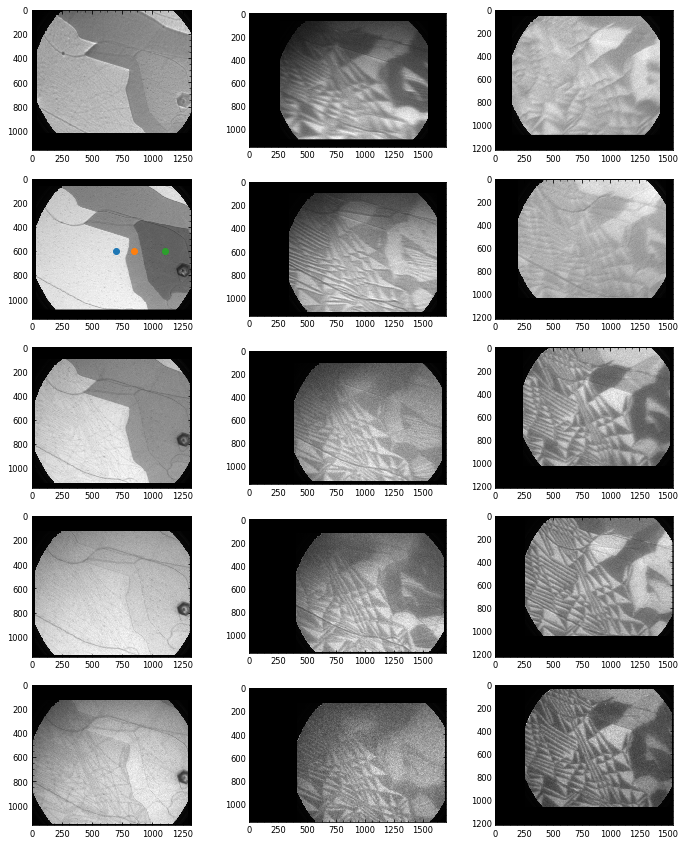

In [3]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=[12,15])
for j,dataset in enumerate([BF,DF1,DF2]): #Imaging mode
    for i,index in enumerate([50, 100, 200, 300, 400]): # Landing energy of the electrons
        axs[i,j].imshow(dataset['Intensity'][index].T, cmap='gray')

spectrum_locations = np.array([[700,600], [850, 600], [1100,600]])
locations_labels = ['2L', '3L', '4L']
for loc in spectrum_locations:
    axs[1,0].plot(loc[0], loc[1], 'o')

Note the inversion of the stacking domains from one dark field to the other, and the appearance of the stacking domain boundaries at the higher energy bright field cuts. Now we plot a spectrum across energy for each marked location (c.f. SI Figure 2 of the paper.):

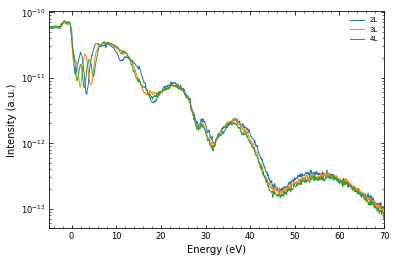

In [4]:
for loc, label in zip(spectrum_locations, locations_labels):
    plt.semilogy(BF['Energy'], BF['Intensity'][:, loc[0], loc[1]] / BF['Multiplier'], label=label)
plt.xlim(-5,70)
plt.ylabel('Intensity ({})'.format(BF['Intensity'].unit))
plt.xlabel('Energy ({})'.format(BF['Energy'].unit))
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\computation.py:561: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


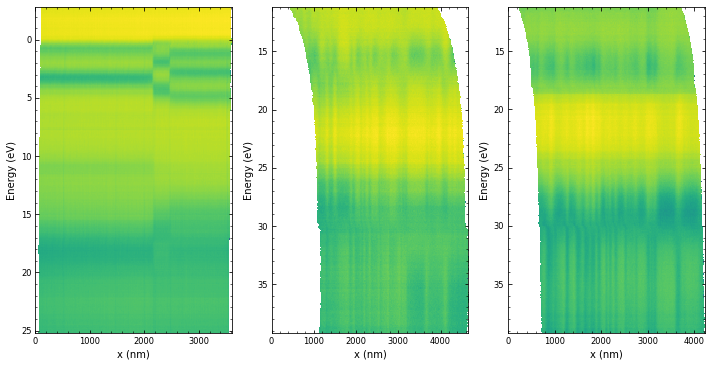

In [5]:
# But we can also do this just for an entire linecut and visualize as images:
fig, axs = plt.subplots(ncols=3, figsize=[12,6])
for j,dataset in enumerate([BF,DF1,DF2]): #Imaging mode
    axs[j].imshow(np.log(dataset['Intensity'][20:300, :, 600] / dataset['Multiplier']), 
           aspect='auto',
           extent=[dataset['x'][0], dataset['x'][-1], dataset['Energy'][300], dataset['Energy'][20]])
    axs[j].set_ylabel('Energy ({})'.format(dataset['Energy'].unit))
    axs[j].set_xlabel('x ({})'.format(dataset['x'].unit))

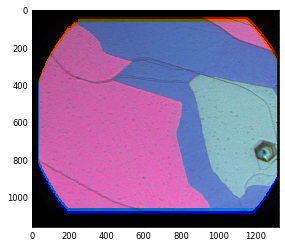

In [6]:
# Or just make a color image just because we can.
image = BF['Intensity'][[70, 86, 116],:,:].astype(float)
image /= image.max(axis=(1,2))
plt.imshow(image.T)
plt.savefig('thumbnail.png', dpi=300)